**1. CARGA Y EXPLORACION DE DATOS**

---



Cargar el dataset y revisar la estructura básica.

Descripción de las variables y su distribución.

Detección y tratamiento de valores nulos.

Identificación y tratamiento de outliers.

Análisis de correlación entre variables.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://docs.google.com/spreadsheets/d/1Eu9DwUThYMz-8uaZ6J0jCpOOEuBAR8P5qExehYED86o/pub?output=csv'
df= pd.read_csv(url)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df['engine-size'].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145])

In [ ]:
df.isna().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [ ]:
df.duplicated().sum()

0

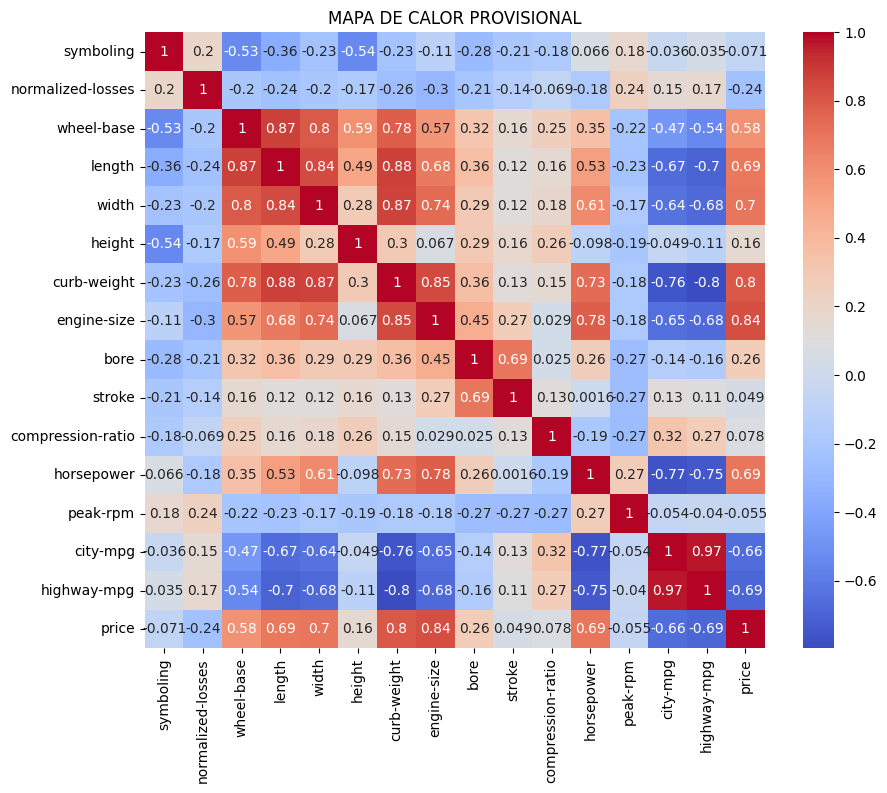

In [ ]:
corr= df.replace('?', 0)
corr[['horsepower','peak-rpm','curb-weight','normalized-losses','price']]=corr[['horsepower','peak-rpm','curb-weight','normalized-losses','price']].astype(int)
corr[['bore','stroke']] = corr[['bore','stroke']].astype(float)
corr1 = corr.select_dtypes(include=['int64', 'float64'])
corr1 = corr1.corr()
fig=plt.figure(figsize=(10,8))
sns.heatmap(corr1, annot=True, cmap='coolwarm')
plt.title('MAPA DE CALOR PROVISIONAL')
plt.show()

**INCONSISTENCIAS**

1. PEAK-RPM


      -Tienes 2 ? y hay que cambiar de tipo de dato a int, el mismo de caballo de fuerza (130,131)
      -El tipo de motor (ohc) influye en el peak-rpm
      -Filre por el tipo de motor y lo sustituire por la mediana de los datos filtaraoos

In [ ]:
#RPM MAXIMO
i = df[df['peak-rpm']=='?']
i

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895


In [ ]:
rpm = corr[corr['engine-type']=='ohc']
print('mediana', rpm['peak-rpm'].median())
print('media', rpm['peak-rpm'].mean())
print('moda', rpm['peak-rpm'].mode())

mediana 5200.0
media 5064.527027027027
moda 0    5500
Name: peak-rpm, dtype: int64


In [ ]:
df.loc[130, 'peak-rpm'] = 5000
df.loc[131, 'peak-rpm'] = 5000

2. HORSEPOWER


    -Tiene 2 ? y hay que cambiar de tipo de dato a int, el mismo de caballo de fuerza (130,131)
    -En el grafico de calor se observa una relacion fuerte con engine-size y 'curb-weight'
        -El de fila 131 reemplzare por 111
        -El de fila 130 por 101

In [ ]:
horse = df.groupby(['engine-size','curb-weight','horsepower',]).size().reset_index(name='counts')
#pd.set_option('display.max_rows', None)
horse.sort_values(by='curb-weight', ascending=True)


,engine-size,curb-weight,horsepower,counts
0,61,1488,48,1
16,92,1713,58,1
17,92,1819,76,1
3,79,1837,60,1
5,90,1874,70,2
...,...,...,...,...
172,183,3750,123,1
173,183,3770,123,1
184,308,3900,184,1
185,326,3950,262,1


In [ ]:
df.loc[130, 'horsepower'] = '1'
df.loc[131, 'horsepower'] = '101'

3. PRECIO


    -4 ? y cambiar a int (9,44,45,129)

In [ ]:
precio = df[df['price'] == '?']
precio

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,03.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,03.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [ ]:
precio = df.groupby(['engine-size','curb-weight','price',]).size().reset_index(name='counts')
#pd.set_option('display.max_rows', None)
precio.sort_values(by='engine-size', ascending=True)

,engine-size,curb-weight,price,counts
0,61,1488,5151,1
1,70,2380,10945,1
2,70,2380,11845,1
3,70,2385,13645,1
4,79,1837,5399,1
...,...,...,...,...
195,258,4066,32250,1
196,258,4066,35550,1
197,304,3715,45400,1
198,308,3900,40960,1


In [ ]:
#son 4 modelos que no representan ni el 10% de mi data asi que los eliminare
eliminar = df[df['price']=='?'].index
df = df.drop(eliminar)

4. NUMERO DE PUERTAS


    -tiene 2 ? (27,53)
    -Todos los sedan de mazda son 2 puertas
    -Pondre 2 puertas igual

In [ ]:
df['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [ ]:
puertas= df[df['num-of-doors']=='?']
puertas

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,03.03,3.39,7.6,102,5500,24,30,8558
63,0,?,mazda,diesel,std,?,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [ ]:
df.loc[27, 'num-of-doors'] = 'two'
df.loc[63, 'num-of-doors'] = 'two'

5. BORE

      -Reemplzado por la moda

In [ ]:
bore = df[df['bore']=='?']
moda = df['bore'].mode()[0]
df['bore'] = df['bore'].replace('?', moda)

6. STROKE

In [ ]:
df['stroke'].unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '03.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '03.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '02.07', '2.36', '2.64',
       '03.08', '3.5', '3.54', '2.87'], dtype=object)

In [ ]:
stroke = df[df['stroke']=='?']
modaa = df['stroke'].mode()[0]
df['stroke'] = df['stroke'].replace('?', moda)

7. NORMALIZES-LOSSES

In [ ]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [ ]:
nor = df[df['normalized-losses']=='197'].T
nor

,178,179
symboling,3,3
normalized-losses,197,197
make,toyota,toyota
fuel-type,gas,gas
aspiration,std,std
num-of-doors,two,two
body-style,hatchback,hatchback
drive-wheels,rwd,rwd
engine-location,front,front
wheel-base,102.9,102.9


In [ ]:
normaliza = df.groupby(['make', 'num-of-doors','symboling','wheel-base','normalized-losses']).size().reset_index(name='counts')
#pd.set_option('display.max_rows', None)

normaliza

,make,num-of-doors,symboling,wheel-base,normalized-losses,counts
0,alfa-romero,two,1,94.5,?,1
1,alfa-romero,two,3,88.6,?,2
2,audi,four,1,105.8,158,2
3,audi,four,1,105.8,?,1
4,audi,four,2,99.4,164,1
...,...,...,...,...,...,...
99,volkswagen,two,3,94.5,256,1
100,volkswagen,two,3,94.5,?,1
101,volvo,four,-2,104.3,103,3
102,volvo,four,-1,104.3,74,3


In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

**TIPO DE DATO**

In [ ]:
df['symboling'].unique() #ordenare de forma ascendentemente mnos peligroso a mas  (-2,-1,0,1,2,3)

array([ 3,  1,  2,  0, -1, -2])

In [ ]:
#CONVERTIR TIPO DE DATOS
df.columns
#stroke = float
#bore = float
#peak-rpm = int
#horsepower = int
#normalized-losses = int
#price = int
df[['stroke', 'bore']] = df[['stroke', 'bore']].astype(float)
df[['horsepower', 'price','peak-rpm']] = df[['horsepower', 'price','peak-rpm']] .astype(int)

# **CONCLUSION**


Se observa cierta correlacion entre los datos, pero en su mayoria no existe alguna relacion por ese motivo se consideraria apropiado aplicar un MODELO DE REGRESION con el objetivo de predecir el precio del auto en base a las caracterisiticas obtenidas.
Optaria por un arbol de regresion aplicando previamente un lazypredict para escoger entre los mejores modelos acompañado de una busqueda de los mejores hiperparametros y finalizando con la optimizacion del modelo.

**KNN**

**INTERPRETACION RESULTADOS**

---


Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.

Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.

*El modelo mas adecuado para el problema de prediccion de precios de autos es el ARBOL DE DECISION, por los siguientes motivos*:

    -r2=91.8%. El modelo explica un 91.8% de la variabilidad de los datos
    -MSE=1822 es el mas bajo, entre los modelos, indica que tiene los errores mas pequeños al predecir el precio.
    -Se recomienda una optimizacion para el KNN


**DESAFIOS ADICIONALES**

---



Optimización de Modelos: Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.

Feature Engineering: Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.

Validación Cruzada: Implementar validación cruzada para evaluar la estabilidad de los modelos.

**OPTIMIZACION DE HIPERPARAMETROS KNN**

In [ ]:

knn=Pipeline(steps=[
    ('pre', preprocesamiento),
    ('modelo', KNeighborsRegressor())
])

parametros = {
    'modelo__n_neighbors':range(1,31)
    }

#validacion cruzada
grid = GridSearchCV(knn, parametros, cv=5, scoring='neg_mean_squared_error')
#entrenamiento del grid
grid.fit(X_train, y_train)

#Mejor valor K

mejor_k = grid.best_params_
print('El mejor valor de K es:',mejor_k)


In [ ]:
mejor_k['modelo__n_neighbors']

In [ ]:
#OPTIMIZAR MODELO
knn.optimizado = Pipeline(steps=[
    ('pre', preprocesamiento),
    ('modelo', KNeighborsRegressor(n_neighbors = mejor_k['modelo__n_neighbors']))
])

#entrenar modelo
knn.optimizado.fit(X_train, y_train)

#predicciones
knn_op_pred = knn.optimizado.predict(X_test)

#metricas
r2_knn_op = r2_score(y_test, knn_op_pred)
mse_knn_op= mean_squared_error(y_test, knn_op_pred)
msa_knn_op = mean_absolute_error(y_test, knn_op_pred)

#EVALUAR MODELO KNN
print('\nKNN OPTIMIZADO')
print('R2:', r2_knn_op)
print('Error cuadratico medio:', mse_knn_op)
print('Error absoluto medio:', msa_knn_op)


**OPTIMIZACION DE HIPERPARAMETROS ARBOL DE DESICION**

In [ ]:
#entrenar modelo
arbol = Pipeline(steps=[
    ('pre', preprocesamiento),
    ('modelo', DecisionTreeRegressor(random_state=42))
])

#definir parametros
para = {
    'modelo__max_depth': range(1,31),
    'modelo__min_samples_split': range(2, 21),  # Número mínimo de muestras para dividir un nodo
    'modelo__min_samples_leaf': range(1, 11)
}

#validacion cruzada-grid
grid_2 = GridSearchCV(arbol, para, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_2.fit(X_train, y_train)

#Resultados
mejor_arbol = grid_2.best_params_
print('El mejor hiperparametro es', mejor_arbol)

In [ ]:
#OPTIMIZAR ARBOL DE DECISION
arbol_optimizado = Pipeline(steps=[
    ('pre', preprocesamiento),
    ('modelo', DecisionTreeRegressor(max_depth=ejor_arbol['modelo__max_depth'], min_samples_split=mejor_arbol['modelo__min_samples_split'],
                                     min_samples_leaf=mejor_arbol['modelo__min_samples_leaf'],random_state=42))
])

#entrenar optimizado
arbol_optimizado.fit(X_train, y_train)
#predicciones
arbol_op_pred = arbol_optimizado.predict(X_test)

#metricas
r2_arbol_op = r2_score(y_test, arbol_op_pred)
mse_arbol_op = mean_squared_error(y_test, arbol_op_pred)
msa_arbol_op = mean_absolute_error(y_test, arbol_op_pred)
print('\nARBOL DE DECISION  OPTIMIZADO')
print('R2:', r2_arbol_op)
print('Error cuadratico medio:', mse_arbol_op)
print('Error absoluto medio:', msa_arbol_op)

# **CONCLUSIONES**



**MODELOS**

---



En una primera instancia el mejor modelo que se ajusta es el arbol de decision:

    -r2=91.8%. El modelo explica un 91.8% de la variabilidad de los datos
    -MSE= 7690895 es el mas bajo, entre los modelos, indica que tiene los errores mas pequeños al predecir el precio.
Le sigue el modelo de regresion lineal

    -r2= 90.9%. Es un buen porcentahe de variablidad
    -MSE= 8583308. Extramadamente superio, por este motivo se queda en 2do lugar
Por ultimo se tuvo al KNN

    -Se recomienda ajustar le modelo ya que fue al que peor le fue


**MODELOS OPTIMIZADOS**

---


ARBOL DE DECISION OPTIMIZADO

    -r2=92%. despues del ajuste vemos una mejora en el % lo cual sigue posicionando como mejor opcion
    -MSE= 7575418 bajo mas entre los modelos, indica que tiene los errores mas pequeños al predecir el precio.

KNN OPTIMIZADO

    -r2= 85.5%. Hubo una mejora considerable
    -MSE= 13432523. Sigue siendo superior pero igual bajo al anterior
